#### Yugandhara Premraj Patil
#### Id : AIS031

### Task on Regression

#### Importing Train Data

In [1]:
import pandas as pd
import numpy as np
train=pd.read_excel(r'C:\Users\HP\Desktop\datasets\train.xlsx')
train.drop("id",axis=1,inplace=True)
train.drop("week",axis=1,inplace=True)
train.drop("center_id",axis=1,inplace=True)
train.drop("meal_id",axis=1,inplace=True)
corrmat=train.corr()
print(train.head())

   checkout_price  base_price  emailer_for_promotion  homepage_featured  \
0          136.83      152.29                      0                  0   
1          136.83      135.83                      0                  0   
2          134.86      135.86                      0                  0   
3          339.50      437.53                      0                  0   
4          243.50      242.50                      0                  0   

   num_orders  
0         177  
1         270  
2         189  
3          54  
4          40  


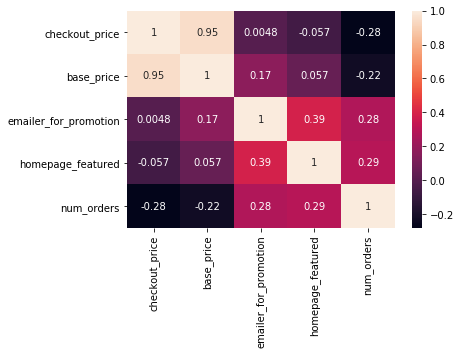

In [2]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

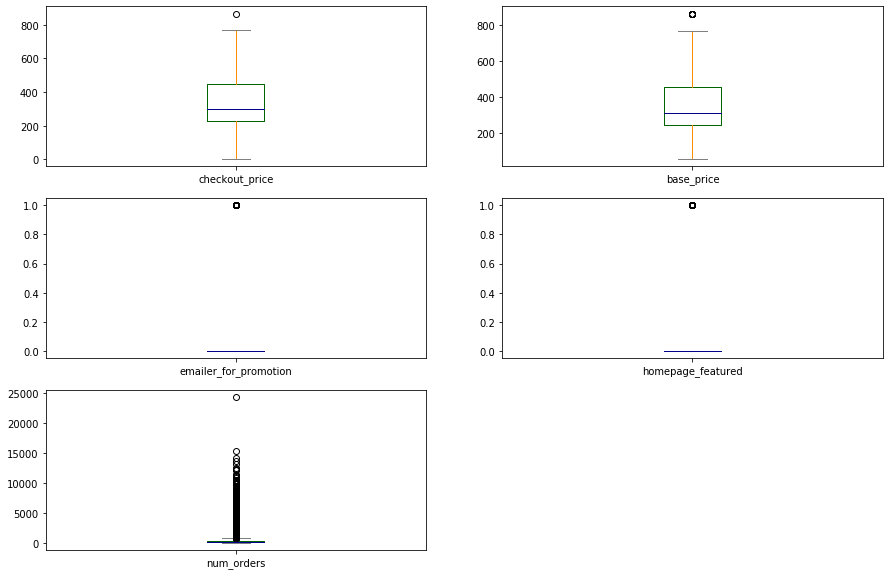

In [3]:
# Checking Otliers
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
train.plot(kind="box",subplots=True,layout=(3,2),figsize=(15,10),color=color)
plt.show()

#### Separating dependent and independent variables from training set

In [26]:
x=train.loc[:,["emailer_for_promotion","homepage_featured","checkout_price","base_price"]]
y=train.loc[:,"num_orders"]
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

#### Generating model for train data

In [6]:
from sklearn.neighbors import KNeighborsRegressor
fm= KNeighborsRegressor(n_neighbors=5)
fm.fit(x_train,y_train)
y_pred=fm.predict(x_test)
y_pred

array([904.6,  73. , 237.8, ..., 783.6, 221. , 156.2])

In [7]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import math
MSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("MSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE :",math.sqrt(MSE))
print("R2 score:",r2_score(y_test,y_pred))


MSE : 294.3671731621765
RMSE : 17.157131845450643
R2 score: 0.4261900998729532


#### Importing Test set

In [17]:
test=pd.read_excel(r'C:\Users\HP\Desktop\datasets\test.xlsx')
test.drop("id",axis=1,inplace=True)
test.drop("week",axis=1,inplace=True)
test.drop("center_id",axis=1,inplace=True)
test.drop("meal_id",axis=1,inplace=True)
corrmat=train.corr()
print(test.head())

   checkout_price  base_price  emailer_for_promotion  homepage_featured
0          158.11      159.11                      0                  0
1          160.11      159.11                      0                  0
2          157.14      159.14                      0                  0
3          162.02      162.02                      0                  0
4          163.93      163.93                      0                  0


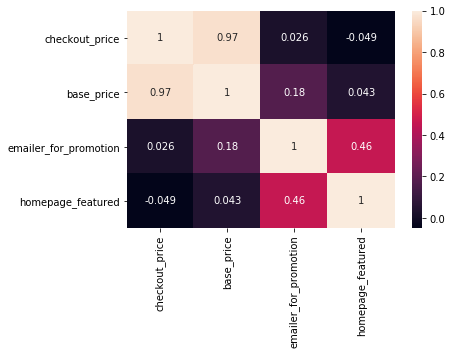

In [18]:
import seaborn as sns
sns.heatmap(test.corr(),annot=True)

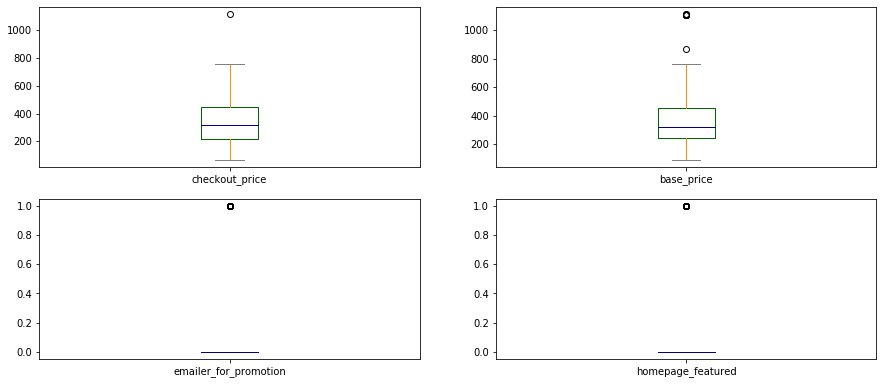

In [19]:
# Checking Otliers
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
test.plot(kind="box",subplots=True,layout=(3,2),figsize=(15,10),color=color)
plt.show()

#### Generating model on test data and Predicting Dependent variable

In [28]:
x1=test.loc[:,["emailer_for_promotion","homepage_featured","checkout_price","base_price"]]

In [30]:
from sklearn.neighbors import KNeighborsRegressor
fm1= KNeighborsRegressor(n_neighbors=5)
fm1.fit(x_train,y_train)
y_pred1=fm1.predict(x1)
y_pred1

array([380.8, 311.6, 413. , ..., 251.2, 251.2, 227.2])

In [31]:
test=pd.read_excel(r'C:\Users\HP\Desktop\datasets\test.xlsx')
center_id=test['center_id']
meal_id=test['meal_id']
week=test['week']
id=test['id']

In [35]:
submission=pd.DataFrame({'center_id':center_id,'meal_id':meal_id,'week':week,'id':id,'num_order':y_pred1})
submission.to_excel("C:\\Users\\HP\\Desktop\\datasets\\sample_submission.xlsx",index=False)